In [ ]:
import tensorflow as tf
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

### Hello World

In [2]:
a = tf.add(4,2)

with tf.Session() as sess:
    print(sess.run(a))

6


### Computation graph

In [3]:
tf.reset_default_graph()

x = 4
y = 2

op1 = tf.add(x, y)
op2 = tf.multiply(x, y)
op3 = tf.pow(op2, op1)

with tf.Session() as sess:
    print(sess.run(op3))

try:
    from utils import show_current_graph
    show_current_graph()
except:
    pass

262144


### Tensors and dimensions

In [4]:
from itertools import combinations

data = [2, [1, 2], [1, 2, 3]]

def get_result(x, y):
    op1 = tf.add(x, y)
    op2 = tf.add(x, y)
    op3 = tf.add(op2, op1)

    with tf.Session() as sess:
        return sess.run(op3)
    
for x, y in combinations(data, 2):
    try:
        result = get_result(x,y)
        print('OK', x, 'and', y, '->', result)
    except:
        print('Fail', x, y)

OK 2 and [1, 2] -> [6 8]
OK 2 and [1, 2, 3] -> [ 6  8 10]
Fail [1, 2] [1, 2, 3]


### Variables

In [5]:
a = tf.Variable([2, 3], name='vector')
b = tf.Variable([[0, 1], [2, 3]], name='matrix')
W = tf.Variable(tf.zeros(shape=[784, 10]), name='tensor')

assign_op = a.assign([1, 2])

init_ab = tf.variables_initializer([a, b])
init_all_vars = tf.global_variables_initializer() # also you gan get all defined vars using tf.global_variables() func

with tf.Session() as sess:
    sess.run(a.initializer) # Initialize a single variable
    print(a.eval())
    # print(b.eval()) # If you try to execute this op you will get a exception
    
    sess.run(init_ab) # Initialize only a subset (a,b) of virables
    print(b.eval())
    
    sess.run(init_all_vars) # Initialize all variables at once
    print(W.eval())
    
    sess.run(assign_op)
    print(a.eval())

[2 3]
[[0 1]
 [2 3]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 2]


### Session

In [6]:
W = tf.Variable(10)

sess1 = tf.Session()
sess2 = tf.Session()

sess1.run(W.initializer)
sess2.run(W.initializer)

print(sess1.run(W.assign_add(10)))
print(sess2.run(W.assign_add(100)))

sess1.close()
sess2.close()

20
110


In [7]:
# Interactive session
sess = tf.InteractiveSession()

a = tf.Variable(2)
b = tf.Variable(2)
c = a + b

tf.global_variables_initializer().run() # Init all variables

print(c.eval())

sess.close()

4


### Placeholders

In [8]:
a = tf.placeholder(tf.float32, shape=[3])
b = tf.constant([5, 5, 5], tf.float32)
c = a + b

with tf.Session() as sess:
    # print(sess.run(c)) # Error because we a doesn't have any value
    
    feed_dict = {a: [5, 2, 3]}
    print(sess.run(c, feed_dict=feed_dict))

[10.  7.  8.]


### Simple regression mode

Epoch 1: [1468.4678]
Epoch 2: [1074.614]
Epoch 3: [793.57513]
Epoch 4: [592.6284]
Epoch 5: [448.6743]


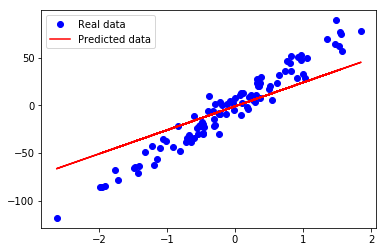

Epoch 6: [345.3657]
Epoch 7: [271.10437]
Epoch 8: [217.64218]
Epoch 9: [179.10074]
Epoch 10: [151.2805]


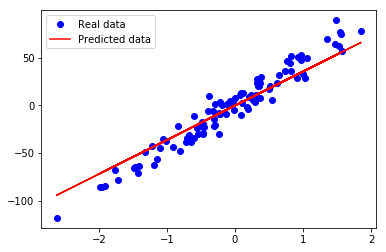

Epoch 11: [131.17607]
Epoch 12: [116.632774]
Epoch 13: [106.10295]
Epoch 14: [98.47275]
Epoch 15: [92.94005]


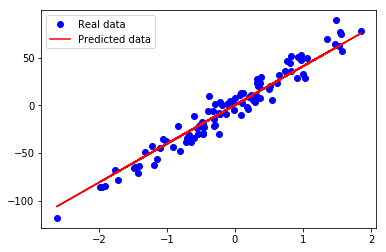

Epoch 16: [88.92606]
Epoch 17: [86.012566]
Epoch 18: [83.89717]
Epoch 19: [82.36088]
Epoch 20: [81.245026]


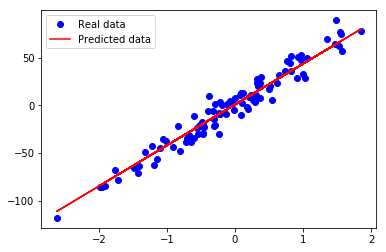

In [11]:
tf.reset_default_graph()

N_EPOCHS = 20

from sklearn.datasets import make_regression

# Step 1: init dataset
X_data, y_data = make_regression(n_features=1, noise=10, random_state=42)
n_samples = X_data.shape[0]

# Step 2: create placeholders for X and Y
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

# Step 4: build model to predict Y
Y_predicted = w * X + b 

# Step 5: use the squared error as the loss function
# you can use either mean squared error or Huber loss
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    
    # Step 8: train the model
    for i in range(1, N_EPOCHS+1): 
        total_loss = 0
        for x, y in zip(X_data, y_data):
            # Session execute optimizer and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        
        if i % 5 == 0:
            # Step 9: output the values of w and b
            w_out, b_out = sess.run([w, b])

            plt.close()
            plt.plot(X_data, y_data, 'bo', label='Real data')
            plt.plot(X_data, X_data * w_out + b_out, 'r', label='Predicted data')
            plt.legend()
            plt.show()

### TF MNIST

In [12]:
from tensorflow.examples.tutorials.mnist import input_data

tf.logging.set_verbosity(tf.logging.ERROR)
tf.reset_default_graph()

# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 30

# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets('data/mnist', one_hot=True)
X_batch, Y_batch = mnist.train.next_batch(batch_size)

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


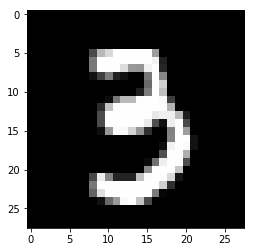

In [13]:
plt.imshow(X_batch[0].reshape((28, 28)), 'gray')

In [15]:
# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='image') 
Y = tf.placeholder(tf.int32, [batch_size, 10], name='label')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.get_variable(name='weights', shape=(784, 10), initializer=tf.random_normal_initializer())
b = tf.get_variable(name='bias', shape=(1, 10), initializer=tf.zeros_initializer())

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch
# loss = tf.reduce_mean(-tf.reduce_sum(tf.nn.softmax(logits) * tf.log(Y), reduction_indices=[1]))

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# Step 7: calculate accuracy with test set
preds = tf.nn.softmax(logits)
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())    
    n_batches = int(mnist.train.num_examples/batch_size)
    
    # train the model n_epochs times
    for i in range(n_epochs): 
        total_loss = 0

        for j in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss], {X: X_batch, Y:Y_batch}) 
            total_loss += loss_batch
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

    # test the model
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0

    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accuracy_batch = sess.run(accuracy, {X: X_batch, Y:Y_batch})
        total_correct_preds += accuracy_batch    

    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

Average loss epoch 0: 1.5618771788401482
Average loss epoch 1: 0.544876130171867
Average loss epoch 2: 0.4379589369733295
Average loss epoch 3: 0.39012344817181566
Average loss epoch 4: 0.35639275848379226
Average loss epoch 5: 0.3389800273767718
Average loss epoch 6: 0.322994687757292
Average loss epoch 7: 0.3093930199256032
Average loss epoch 8: 0.30251667427988876
Average loss epoch 9: 0.29439528840474594
Average loss epoch 10: 0.29144419818282963
Average loss epoch 11: 0.28785466897737727
Average loss epoch 12: 0.2820782651017596
Average loss epoch 13: 0.2782116702178141
Average loss epoch 14: 0.27246564793420003
Average loss epoch 15: 0.27446456951694886
Average loss epoch 16: 0.2718764419704328
Average loss epoch 17: 0.2674681920306388
Average loss epoch 18: 0.2642003159561913
Average loss epoch 19: 0.2658069004024659
Average loss epoch 20: 0.2647009562952813
Average loss epoch 21: 0.2640864289949685
Average loss epoch 22: 0.2627301568508426
Average loss epoch 23: 0.2599070919351

In [16]:
try:
    from utils import show_current_graph
    show_current_graph()
except:
    pass

### Keras MNIST

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=batch_size, epochs=5,
          validation_data = (mnist.test.images, mnist.test.labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 1s 25us/step - loss: 0.3689 - acc: 0.8994 - val_loss: 0.1970 - val_acc: 0.9427
Epoch 2/5
55000/55000 [==============================] - 1s 23us/step - loss: 0.1677 - acc: 0.9516 - val_loss: 0.1456 - val_acc: 0.9565
Epoch 3/5
55000/55000 [==============================] - 1s 23us/step - loss: 0.1219 - acc: 0.9648 - val_loss: 0.1172 - val_acc: 0.9656
Epoch 4/5
55000/55000 [==============================] - 1s 23us/step - loss: 0.0945 - acc: 0.9730 - val_loss: 0.0993 - val_acc: 0.9704
Epoch 5/5
55000/55000 [==============================] - 1s 23us/step - loss: 0.0765 - acc: 0.9780 - val_loss: 0.0906 - val_acc: 0.9728


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_test = mnist.test.labels.argmax(axis=1)
y_predicted_scores = model.predict(mnist.test.images)
y_predicted = y_predicted_scores.argmax(axis=1)

print('Classification report\n')
print(classification_report(y_test, y_predicted))

Classification report

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.98       892
           6       0.97      0.98      0.97       958
           7       0.99      0.96      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.96      0.96      0.96      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



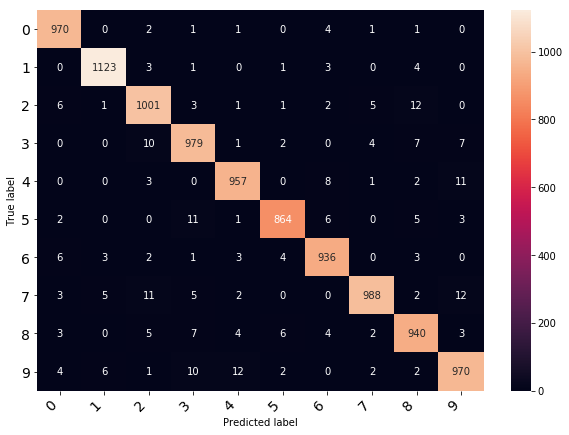

In [29]:
from utils import print_confusion_matrix
print_confusion_matrix(confusion_matrix(y_test, y_predicted), range(0, 10))
plt.show()

Correct label: 9
Predicted: 4 with score 0.999025


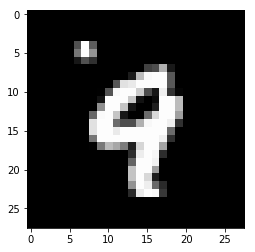

Correct label: 6
Predicted: 1 with score 0.99695504


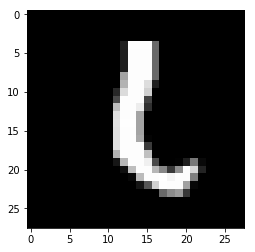

Correct label: 8
Predicted: 4 with score 0.9946444


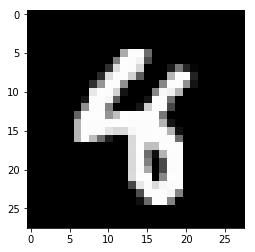

Correct label: 8
Predicted: 4 with score 0.9927805


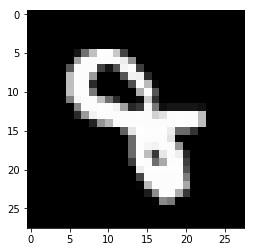

Correct label: 9
Predicted: 3 with score 0.99186194


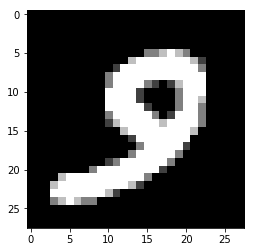

In [30]:
# show incorrect predictions

from itertools import islice

incorrect_classified = y_test != y_predicted
incorrect_classified_scores = y_predicted_scores[incorrect_classified]
incorrect_classified_scores_sorted_idx = incorrect_classified_scores.max(axis=1).argsort()[::-1]
incorrect_classified_scores = incorrect_classified_scores[incorrect_classified_scores_sorted_idx]

incorrect_classified_images = mnist.test.images[incorrect_classified][incorrect_classified_scores_sorted_idx]
incorrect_classified_gt = y_test[incorrect_classified][incorrect_classified_scores_sorted_idx]


top_n_examples = 5
iter_incorrect = islice(zip(incorrect_classified_images,
                            incorrect_classified_gt,
                            incorrect_classified_scores),
                        top_n_examples)

for im, label, score in iter_incorrect:
    print('Correct label:', label)
    predicted_label = score.argmax()
    print('Predicted:', predicted_label, 'with score', score[predicted_label])
    plt.imshow(im.reshape((28, 28)), 'gray')
    plt.show()

# More examples

[DeepDream](http://nbviewer.jupyter.org/github/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb)

[Neural networks](https://github.com/aymericdamien/TensorFlow-Examples)

[TF official examples](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/learn)